In [1]:
import pandas as pd
import gc

In [2]:
sunat_train = pd.read_csv('../data/sunat_train.csv')
# rcc_train = pd.read_csv('../data/rcc_train.csv')
# se_train = pd.read_csv('../data/se_train.csv', index_col = 'key_value')
# censo_train = pd.read_csv('../data/censo_train.csv', index_col = 'key_value')
y_train = pd.read_csv('../data/y_train.csv', index_col = 'key_value')

sunat_test = pd.read_csv('../data/sunat_test.csv')
# rcc_test = pd.read_csv('../data/rcc_test.csv')
# se_test = pd.read_csv('../data/se_test.csv', index_col = 'key_value')
# censo_test = pd.read_csv('../data/censo_test.csv', index_col = 'key_value')

In [63]:
rcc_train = pd.read_csv('../data/rcc_train.csv')

In [ ]:
############################# sunat_train
### consta de 1462036 registros con 17 features
### fecalta y fecbaja tienen valores nulos de 1.5% y 49.5%
### el 34% de key_value no existe en sunat_train

### tipcontribuyente Tiene 50 clases ### freq 29 
### tippersona Tiene 3 clases ### Freq 1 
### ciiu ,codigo de actividad economica, Tiene 285 clases ### Freq 285
### ubigeo Tiene 1655 clases ### Freq 442
### condiciondomicilio tiene 16 clases ### Freq 4
### condiciondomicilio tiene 13 clases ### Freq 3
### codvia tiene 29 clases ### Freq 0
### codzona tiene 36 clases ### Freq 0
### contabilidad tiene 12 clases ### Freq 6
### facturacion tiene 21 clases ### Freq 11
### domiciliado tiene 3 clases ### Freq 1
### comercioexterior tiene 14 clases ### Freq 2
### cargorele tiene 656 clases ### Freq 635
### codentidadtributo tiene 9 clases ### Freq 6
### estadotributo tiene 3 clases ### Freq 1


In [ ]:
### hay algunos clientes que tienen fecha de alta, pero no fecha de baja, siendo estos 723714 registros
### los clientes que no tienen fecha de alta, tampoco tienen fecha de baja, por obvias razones. Aunque has un caso donde
#un cliente no tiene fecha de alta pero si fecha de baja siendo esto cerca de 20897 registros
### clientes que tienen fecha de alta , asi como fecha de baja son cerca de 738321 registros

### cuando se trata de un cliente nuevo en el rcc, la proporcion de valores nulos de la fecha de alta se mantiene, 
# mientras que la fecha de baja aumenta de 49% as 86%

In [109]:
agg_sunat = {'fecbaja':['unique'],
             'fecalta':['unique']}
sunat_train.groupby('key_value').agg(agg_sunat)

,fecbaja,fecalta
,unique,unique
key_value,,
0,[nan],[0.9715844553529064]
1,[nan],[0.5660267101778399]
2,[nan],[0.7012126252361953]
3,[nan],[1.5123281155863282]
5,"[-2.55605078761138, nan]","[-0.515460610289004, -1.1913901855807814]"
...,...,...
358481,[nan],[1.917885860761395]
358482,[nan],[0.4308407951194844]


In [110]:
sunat_train[sunat_train.key_value==5]

,key_value,tipcontribuyente,tippersona,ciiu,ubigeo,condiciondomicilio,estadocontribuyente,fecalta,fecbaja,codvia,codzona,contabilidad,facturacion,domiciliado,comercioexterior,cargorele,codentidadtributo,estadotributo
352708,5,9,0,283,466,0,4,-0.515461,-2.556051,3,0,2,2,0,2,635,8,2
382676,5,9,0,283,1559,0,0,-1.191390,NaN,3,34,1,1,0,2,635,8,2


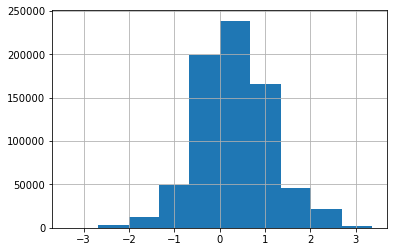

In [50]:
(sunat_train['fecbaja']-sunat_train['fecalta']).hist()

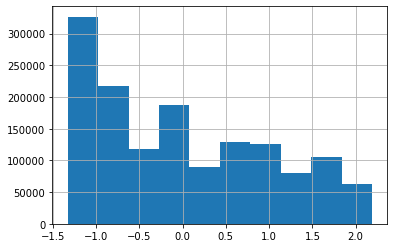

In [39]:
sunat_train['fecalta'].hist()

In [56]:
max(sunat_train['fecbaja'].fillna(0)), max(sunat_train['fecalta'].fillna(0))

(2.1685081879240307, 2.188257690878105)